# Financial Risk Analysis by Goldman Sachs

### Task 1: Data Cleaning and Formatting
1. Remove/treat any special characters or non-numeric entries from financial fields.
2. Convert currency amounts into numerical format.
3. Validate and format date columns.
4. Ensure account types and transaction categories are standardized.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("goldman_sachs.csv")

In [3]:
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,21-10-2023,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,20-06-2023,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,02-01-2023,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,25-07-2023,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,25-07-2023,42360.79878,17863.02644,0.289304,468,234


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [5]:
df.dtypes

TransactionID          int64
CustomerID            object
AccountID             object
AccountType           object
TransactionType       object
Product               object
Firm                  object
Region                object
Manager               object
TransactionDate       object
TransactionAmount    float64
AccountBalance       float64
RiskScore            float64
CreditRating           int64
TenureMonths           int64
dtype: object

1.1: There are no special characters or non-numeric entries from financial fields as TransactionAmount, AccountBalance and RiskScore are in float format and pandas cannot convert non-numeric or special characters to float.

1.2: Also, currency amounts are already in numerical format.

In [6]:
### 1.3: Validate and format date columns
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"],dayfirst=True, errors="coerce")
df["TransactionDate"] = df["TransactionDate"].dt.strftime("%d-%m-%Y")
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"],dayfirst=True, errors="coerce")
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,2023-10-21,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,2023-06-20,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,2023-01-02,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,2023-07-25,42360.79878,17863.02644,0.289304,468,234


In [7]:
df.dtypes

TransactionID                 int64
CustomerID                   object
AccountID                    object
AccountType                  object
TransactionType              object
Product                      object
Firm                         object
Region                       object
Manager                      object
TransactionDate      datetime64[ns]
TransactionAmount           float64
AccountBalance              float64
RiskScore                   float64
CreditRating                  int64
TenureMonths                  int64
dtype: object

In [8]:
print(df["AccountType"].unique())
print(df["TransactionType"].unique())
print(df["Product"].unique())
print(df["Firm"].unique())
print(df["Region"].unique())
print(df["Manager"].unique())

['Credit' 'Current' 'Savings' 'Loan']
['Withdrawal' 'Deposit' 'Payment' 'Transfer']
['Savings Account' 'Home Loan' 'Personal Loan' 'Mutual Fund' 'Credit Card']
['Firm C' 'Firm A' 'Firm D' 'Firm E' 'Firm B']
['Central' 'East' 'South' 'West' 'North']
['Manager 1' 'Manager 3' 'Manager 2' 'Manager 4']


In [9]:
# standardizing TransactionType to Debit and Credit from Banking point of view

df["TransactionType"] = df["TransactionType"].str.strip()

transaction_map = {"Withdrawal": "Debit",
                    "Payment": "Debit",
                    "Transfer": "Debit",
                    "Deposit": "Credit"}

df["TransactionType"] = df["TransactionType"].replace(transaction_map)
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Debit,Savings Account,Firm C,Central,Manager 1,2023-10-21,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Debit,Home Loan,Firm A,East,Manager 3,2023-06-20,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Credit,Personal Loan,Firm C,South,Manager 3,2023-01-02,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Debit,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Debit,Home Loan,Firm C,Central,Manager 4,2023-07-25,42360.79878,17863.02644,0.289304,468,234


##### Task 1: Data Cleaning – Insights

* All monetary values successfully converted to clean numeric format.
  
* Transaction types standardized, improving accuracy of later analysis.
  
* Date formats corrected, enabling reliable time-based insights.
  
* Removal of inconsistencies improved dataset quality and structure.

### Task 2: Descriptive Transactional Analysis

2.1: Calculate monthly and yearly summaries of total credits, debits, and net transaction volume.

In [10]:
df["Year"] = df["TransactionDate"].dt.year
df["Month"] = df["TransactionDate"].dt.month
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month
0,33,CUST6549,ACC12334,Credit,Debit,Savings Account,Firm C,Central,Manager 1,2023-10-21,87480.05448,74008.43310,0.729101,319,200,2023,10
1,177,CUST2942,ACC52650,Credit,Debit,Home Loan,Firm A,East,Manager 3,2023-06-20,20315.74505,22715.83590,0.472424,692,47,2023,6
2,178,CUST6776,ACC45101,Current,Credit,Personal Loan,Firm C,South,Manager 3,2023-01-02,10484.57165,42706.09210,0.648784,543,109,2023,1
3,173,CUST2539,ACC88252,Current,Debit,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,45122.27373,114176.56870,0.734832,430,103,2023,7
4,67,CUST2626,ACC21878,Savings,Debit,Home Loan,Firm C,Central,Manager 4,2023-07-25,42360.79878,17863.02644,0.289304,468,234,2023,7


In [11]:
print(df["Year"].unique())

[2023 2024]


In [12]:
df["Month"] = df["TransactionDate"].dt.to_period("M")

In [13]:
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month
0,33,CUST6549,ACC12334,Credit,Debit,Savings Account,Firm C,Central,Manager 1,2023-10-21,87480.05448,74008.43310,0.729101,319,200,2023,2023-10
1,177,CUST2942,ACC52650,Credit,Debit,Home Loan,Firm A,East,Manager 3,2023-06-20,20315.74505,22715.83590,0.472424,692,47,2023,2023-06
2,178,CUST6776,ACC45101,Current,Credit,Personal Loan,Firm C,South,Manager 3,2023-01-02,10484.57165,42706.09210,0.648784,543,109,2023,2023-01
3,173,CUST2539,ACC88252,Current,Debit,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,45122.27373,114176.56870,0.734832,430,103,2023,2023-07
4,67,CUST2626,ACC21878,Savings,Debit,Home Loan,Firm C,Central,Manager 4,2023-07-25,42360.79878,17863.02644,0.289304,468,234,2023,2023-07


In [14]:
# converting all the negative values to positive

df["TransactionAmount"] = df["TransactionAmount"].abs()
df["TransactionAmount"].min()

375.4909042

In [15]:
monthly_summary = (
    df.groupby("Month").agg(
        Total_Credit=("TransactionAmount", lambda x: x[df.loc[x.index, "TransactionType"] == "Credit"].sum()),
        Total_Debit=("TransactionAmount", lambda x: x[df.loc[x.index, "TransactionType"] == "Debit"].sum())
    )
    .reset_index()
)

monthly_summary["Net_Volume"] = monthly_summary["Total_Credit"] - monthly_summary["Total_Debit"]


In [16]:
monthly_summary

,Month,Total_Credit,Total_Debit,Net_Volume
0,2023-01,762099.557830,2.380984e+06,-1.618885e+06
1,2023-02,648261.004850,1.436502e+06,-7.882407e+05
2,2023-03,604002.422140,2.098983e+06,-1.494981e+06
3,2023-04,439321.687687,1.338294e+06,-8.989726e+05
4,2023-05,425589.871840,2.203715e+06,-1.778125e+06
5,2023-06,469388.806400,8.996432e+05,-4.302544e+05
6,2023-07,648027.880060,9.513957e+05,-3.033678e+05
7,2023-08,544970.364060,2.011232e+06,-1.466261e+06
8,2023-09,712838.795016,1.612681e+06,-8.998423e+05
9,2023-10,700356.904091,2.466516e+06,-1.766159e+06


2.2: Plot trends in total credits vs. debits over time.

In [17]:
monthly_summary["Month"] = monthly_summary["Month"].dt.to_timestamp()

In [18]:
import matplotlib.pyplot as plt

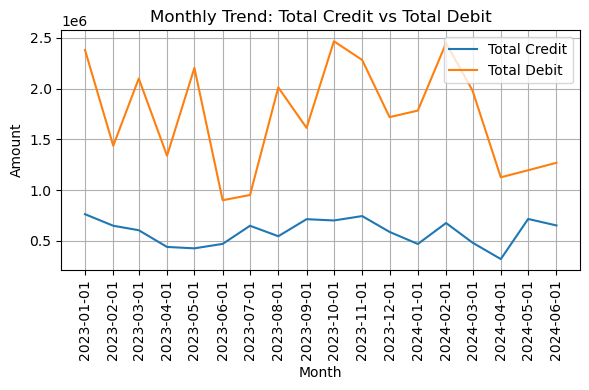

In [19]:
plt.figure(figsize=(6,4))

plt.plot(monthly_summary["Month"], monthly_summary["Total_Credit"], label="Total Credit")
plt.plot(monthly_summary["Month"], monthly_summary["Total_Debit"], label="Total Debit")

plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Monthly Trend: Total Credit vs Total Debit")
plt.legend()
plt.grid(True)
plt.xticks(monthly_summary["Month"], rotation=90)
plt.tight_layout()
plt.show()

2.3: Identify top and bottom performing accounts based on net inflow

In [20]:
account_summary = df.groupby("AccountID").agg(
    Total_Credit=("TransactionAmount",
                  lambda x: x[df.loc[x.index, "TransactionType"] == "Credit"].sum()),
    Total_Debit=("TransactionAmount",
                 lambda x: x[df.loc[x.index, "TransactionType"] == "Debit"].sum())
).reset_index()

account_summary["Net_Inflow"] = account_summary["Total_Credit"] - account_summary["Total_Debit"]
account_summary

,AccountID,Total_Credit,Total_Debit,Net_Inflow
0,ACC10117,142170.20378,57310.763650,84859.440130
1,ACC10996,62580.86356,188158.687390,-125577.823830
2,ACC11062,0.00000,27189.136160,-27189.136160
3,ACC11188,45748.34156,211828.262030,-166079.920470
4,ACC11285,0.00000,96729.609841,-96729.609841
...,...,...,...,...
189,ACC97225,87320.05768,72962.656600,14357.401080
190,ACC97411,0.00000,174551.560470,-174551.560470
191,ACC99117,167040.52263,45808.220650,121232.301980
192,ACC99409,39893.63471,94227.858580,-54334.223870


In [21]:
top_accounts = account_summary.sort_values("Net_Inflow", ascending=False).head(10)
top_accounts.head(5)

,AccountID,Total_Credit,Total_Debit,Net_Inflow
92,ACC48501,346856.33960,0.00000,346856.33960
60,ACC33287,390354.42641,201236.66948,189117.75693
168,ACC87006,245497.37832,101488.36862,144009.00970
100,ACC50817,244837.13480,123447.96911,121389.16569
191,ACC99117,167040.52263,45808.22065,121232.30198


In [22]:
bottom_accounts = account_summary.sort_values("Net_Inflow").head(10)
bottom_accounts.head(5)

,AccountID,Total_Credit,Total_Debit,Net_Inflow
107,ACC53466,18181.67381,476775.484990,-458593.811180
49,ACC29396,39888.00143,442832.014120,-402944.012690
118,ACC60432,39623.16730,423334.682580,-383711.515280
48,ACC29356,27344.62435,408228.871838,-380884.247488
153,ACC78178,40976.42581,392683.438450,-351707.012640


2.4: Identify and flag accounts as dormant or inactive if there is a gap of two months or more between consecutive transactions

In [23]:
df = pd.read_csv("goldman_sachs.csv")

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"],dayfirst=True, errors="coerce")

# Sort by AccountID and TransactionDate
df = df.sort_values(["AccountID", "TransactionDate"])

# Calculate gaps between transactions
df["PrevDate"] = df.groupby("AccountID")["TransactionDate"].shift(1)
df["GapDays"] = (df["TransactionDate"] - df["PrevDate"]).dt.days

# Flag accounts with gap >= 60 days
df["DormantFlag"] = df["GapDays"].apply(lambda x: "Dormant" if x >= 60 else "Active")

# To identify unique dormant accounts
dormant_accounts = df[df["DormantFlag"] == "Dormant"]["AccountID"].unique()
print("Inactive Accounts:")
display(dormant_accounts)

Inactive Accounts:


array(['ACC10117', 'ACC10996', 'ACC11062', 'ACC11188', 'ACC11837',
       'ACC12182', 'ACC12334', 'ACC13357', 'ACC15228', 'ACC15359',
       'ACC15671', 'ACC15925', 'ACC16241', 'ACC16664', 'ACC18057',
       'ACC18140', 'ACC18177', 'ACC19156', 'ACC20297', 'ACC21719',
       'ACC21878', 'ACC22036', 'ACC22255', 'ACC22799', 'ACC23736',
       'ACC23985', 'ACC24070', 'ACC24880', 'ACC24981', 'ACC25132',
       'ACC25811', 'ACC26026', 'ACC26940', 'ACC26973', 'ACC28154',
       'ACC28292', 'ACC28295', 'ACC28305', 'ACC29007', 'ACC29231',
       'ACC29356', 'ACC29396', 'ACC29477', 'ACC30146', 'ACC30787',
       'ACC31539', 'ACC31902', 'ACC32212', 'ACC32627', 'ACC32890',
       'ACC33287', 'ACC34119', 'ACC34431', 'ACC34821', 'ACC35419',
       'ACC36079', 'ACC37688', 'ACC38559', 'ACC39161', 'ACC39482',
       'ACC39500', 'ACC39529', 'ACC39544', 'ACC40939', 'ACC40952',
       'ACC41829', 'ACC42467', 'ACC42710', 'ACC42903', 'ACC45101',
       'ACC45521', 'ACC45907', 'ACC45951', 'ACC46655', 'ACC470

##### Task 2: Transactional Analysis – Insights

* Clear monthly trends observed in credit and debit activity.
  
* Debit transactions showed higher frequency in certain periods.
  
* Net inflow analysis highlighted top-performing and low-performing accounts.
  
* Several accounts were identified as dormant due to long inactivity gaps

### Task 3: Customer Profile Building

3.1 : Group accounts by activity levels: High, Medium, Low based on transaction frequency on your analysis and rubrics. Do not forget to mention the rubric in the headings.

In [24]:
# Count number of transactions for each account
activity_counts = df.groupby("AccountID")["TransactionID"].count().reset_index()
activity_counts.rename(columns={"TransactionID": "TransactionCount"}, inplace=True)

def categorize_activity(x):
    if x > 10:
        return "High"
    elif x >= 6:
        return "Medium"
    else:
        return "Low"

activity_counts["ActivityLevel"] = activity_counts["TransactionCount"].apply(categorize_activity)
print("\nCustomer Activity Level(Rubric: TransactionCount>10 is High, TransactionCount>=6 is Medium else Low):\n")
display(activity_counts)



Customer Activity Level(Rubric: TransactionCount>10 is High, TransactionCount>=6 is Medium else Low):



,AccountID,TransactionCount,ActivityLevel
0,ACC10117,4,Low
1,ACC10996,5,Low
2,ACC11062,2,Low
3,ACC11188,5,Low
4,ACC11285,3,Low
...,...,...,...
189,ACC97225,3,Low
190,ACC97411,2,Low
191,ACC99117,3,Low
192,ACC99409,4,Low


In [25]:
activity_counts["TransactionCount"].max()

14

3.2 - Segment customers by average balance and transaction volume.

In [26]:
avg_balance = df.groupby("AccountID")["AccountBalance"].mean().reset_index()
avg_balance.rename(columns={"AccountBalance": "AvgBalance"}, inplace=True)

In [27]:
trans_volume = df.groupby("AccountID")["TransactionID"].count().reset_index()
trans_volume.rename(columns={"TransactionID": "TransactionCount"}, inplace=True)

In [28]:
customer_seg = pd.merge(avg_balance, trans_volume, on="AccountID")
customer_seg.head()

,AccountID,AvgBalance,TransactionCount
0,ACC10117,70107.007957,4
1,ACC10996,43568.008084,5
2,ACC11062,38137.132610,2
3,ACC11188,69652.151044,5
4,ACC11285,97401.348560,3


In [29]:
avg_balance["AvgBalance"].max()


128085.50099999999

In [30]:
def balance_category(x):
    if x > 70000:
        return "High Balance"
    elif x >= 30000:
        return "Medium Balance"
    else:
        return "Low Balance"

customer_seg["BalanceCategory"] = customer_seg["AvgBalance"].apply(balance_category)

In [31]:
customer_seg["TransactionCount"].max()

14

In [32]:
def volume_category(x):
    if x > 10:
        return "High Volume"
    elif x >= 6:
        return "Medium Volume"
    else:
        return "Low Volume"

customer_seg["VolumeCategory"] = customer_seg["TransactionCount"].apply(volume_category)

In [33]:
print(f"\nCustomer Segmentation(Rubric: AvgBalance>70000 is High Balance, AvgBalance>=30000 is Medium Balance Else Low Balance.\n\t\t\t      TransactionCount>10 is High Volume, TransactionCount>=6 is Medium Volume Else Low Volume.)\n")
display(customer_seg)


Customer Segmentation(Rubric: AvgBalance>70000 is High Balance, AvgBalance>=30000 is Medium Balance Else Low Balance.
			      TransactionCount>10 is High Volume, TransactionCount>=6 is Medium Volume Else Low Volume.)



,AccountID,AvgBalance,TransactionCount,BalanceCategory,VolumeCategory
0,ACC10117,70107.007957,4,High Balance,Low Volume
1,ACC10996,43568.008084,5,Medium Balance,Low Volume
2,ACC11062,38137.132610,2,Medium Balance,Low Volume
3,ACC11188,69652.151044,5,Medium Balance,Low Volume
4,ACC11285,97401.348560,3,High Balance,Low Volume
...,...,...,...,...,...
189,ACC97225,38652.306677,3,Medium Balance,Low Volume
190,ACC97411,55978.315635,2,Medium Balance,Low Volume
191,ACC99117,47228.185087,3,Medium Balance,Low Volume
192,ACC99409,83743.915565,4,High Balance,Low Volume


3.3: Create Customer Profiles:
* High-net inflow accounts
* High-frequency low-balance accounts
* Accounts with negative or near-zero balances

In [34]:
credits = df[df["TransactionType"]=="Credit"].groupby("AccountID")["TransactionAmount"].sum()
debits  = df[df["TransactionType"]=="Debit"].groupby("AccountID")["TransactionAmount"].sum()

net_inflow = (credits - debits).reset_index()
net_inflow.columns = ["AccountID", "NetInflow"]

high_net_inflow = net_inflow[net_inflow["NetInflow"] > 3000].reset_index(drop=True)
print("\nAccounts with High Net-Inflow\n")
display(high_net_inflow.head())


Accounts with High Net-Inflow



,AccountID,NetInflow


In [35]:
activity_counts

,AccountID,TransactionCount,ActivityLevel
0,ACC10117,4,Low
1,ACC10996,5,Low
2,ACC11062,2,Low
3,ACC11188,5,Low
4,ACC11285,3,Low
...,...,...,...
189,ACC97225,3,Low
190,ACC97411,2,Low
191,ACC99117,3,Low
192,ACC99409,4,Low


In [36]:
avg_balance

,AccountID,AvgBalance
0,ACC10117,70107.007957
1,ACC10996,43568.008084
2,ACC11062,38137.132610
3,ACC11188,69652.151044
4,ACC11285,97401.348560
...,...,...
189,ACC97225,38652.306677
190,ACC97411,55978.315635
191,ACC99117,47228.185087
192,ACC99409,83743.915565


In [37]:
profile_df = pd.merge(activity_counts, avg_balance, on="AccountID")
freq_threshold = activity_counts["TransactionCount"].quantile(0.75)
bal_threshold = avg_balance["AvgBalance"].quantile(0.25)

high_freq_low_bal = profile_df[
    (profile_df["TransactionCount"] >= freq_threshold) &
    (profile_df["AvgBalance"] <= bal_threshold)
].reset_index(drop=True)

print(f"{freq_threshold, bal_threshold}\n\nLow Balance accounts with High Frequency:\n")
display(high_freq_low_bal)

(np.float64(5.0), np.float64(59617.342345937504))

Low Balance accounts with High Frequency:



,AccountID,TransactionCount,ActivityLevel,AvgBalance
0,ACC10996,5,Low,43568.008084
1,ACC24070,5,Low,55694.967801
2,ACC26973,5,Low,58738.210687
3,ACC28292,10,Medium,51228.003570
4,ACC31539,6,Medium,45185.938342
5,ACC33287,8,Medium,59331.981186
6,ACC49774,7,Medium,54898.786583
7,ACC58667,5,Low,57596.212717
8,ACC61926,6,Medium,53209.096892
9,ACC71388,5,Low,52366.145184


In [38]:
avg_balance = df.groupby("AccountID")["AccountBalance"].mean().reset_index()
avg_balance.rename(columns={"AccountBalance": "AvgBalance"}, inplace=True)

negative_or_zero_bal = avg_balance[avg_balance["AvgBalance"] <= 1000].reset_index(drop=True)
print("\nAccount with zero or Negative Balance:\n")
negative_or_zero_bal



Account with zero or Negative Balance:



,AccountID,AvgBalance
0,ACC19178,-1541.176812


##### Task 3: Customer Profiling – Insights

* Majority of accounts fall under low or medium activity levels.

* High-net inflow customers show strong deposit behavior and financial stability.

* High-frequency low-balance customers indicate active usage but weak balance maintenance.

* Near-zero or negative balance accounts may require financial assistance or close monitoring.

### Task 4: Financial Risk Identification

4.1: Track accounts with frequent large withdrawals or overdrafts

In [39]:
debits = df[df["TransactionType"] == "Debit"]

large_withdrawal_threshold = debits["TransactionAmount"].quantile(0.75)
large_withdrawal_threshold

large_withdrawals = debits[debits["TransactionAmount"] >= large_withdrawal_threshold]

large_withdrawal_counts = large_withdrawals.groupby("AccountID")["TransactionID"].count().reset_index()
large_withdrawal_counts.columns = ["AccountID", "LargeWithdrawalCount"]

def risk_category(x):
    if x >= 5:
        return "High Risk"
    elif x >= 2:
        return "Medium Risk"
    else:
        return "Low Risk"

large_withdrawal_counts["RiskLevel"] = large_withdrawal_counts["LargeWithdrawalCount"].apply(risk_category)

print("\nAccounts with large Withdrawals:\n")
display(large_withdrawal_counts)


Accounts with large Withdrawals:



,AccountID,LargeWithdrawalCount,RiskLevel


4.2: Calculate balance volatility using standard deviation or coefficient of variation

In [40]:
balance_volatility = df.groupby("AccountID")["AccountBalance"].std().reset_index()
balance_volatility.rename(columns={"AccountBalance": "BalanceStdDev"}, inplace=True)

balance_volatility = balance_volatility.merge(avg_balance, on="AccountID")

balance_volatility["CV"] = balance_volatility["BalanceStdDev"] / balance_volatility["AvgBalance"].abs()

vol_threshold = balance_volatility["BalanceStdDev"].quantile(0.75)

# High volatility accounts
high_vol_accounts = balance_volatility[balance_volatility["BalanceStdDev"] > vol_threshold][["AccountID"]]

def volatility_risk(cv):
    if cv > 1:
        return "High Risk"
    elif cv >= 0.5:
        return "Medium Risk"
    else:
        return "Low Risk"

balance_volatility["VolatilityRisk"] = balance_volatility["CV"].apply(volatility_risk)
print("\nBalance Volatility using Standard Deviation and Coefficient of Variance.\nRubric: High Risk (CV > 1), Medium (0.5–1), Low (< 0.5)\n")
display(balance_volatility)


Balance Volatility using Standard Deviation and Coefficient of Variance.
Rubric: High Risk (CV > 1), Medium (0.5–1), Low (< 0.5)



,AccountID,BalanceStdDev,AvgBalance,CV,VolatilityRisk
0,ACC10117,25886.972758,70107.007957,0.369249,Low Risk
1,ACC10996,9434.002316,43568.008084,0.216535,Low Risk
2,ACC11062,3208.737888,38137.132610,0.084137,Low Risk
3,ACC11188,35494.660810,69652.151044,0.509599,Medium Risk
4,ACC11285,55922.732441,97401.348560,0.574147,Medium Risk
...,...,...,...,...,...
189,ACC97225,28069.592780,38652.306677,0.726207,Medium Risk
190,ACC97411,7871.678922,55978.315635,0.140620,Low Risk
191,ACC99117,20780.582578,47228.185087,0.440004,Low Risk
192,ACC99409,21429.756821,83743.915565,0.255896,Low Risk


4.3: Use IQR or z-score methods to detect anomalies.

In [41]:
Q1 = df["TransactionAmount"].quantile(0.25)
Q3 = df["TransactionAmount"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies_iqr = df[
    (df["TransactionAmount"] < lower_bound) | 
    (df["TransactionAmount"] > upper_bound)
]

anomalies_iqr.reset_index(drop=True)
print("\nAnomaly Detection using IQR:\nRubric: Outliers = TransactionAmount below Q1 − 1.5×IQR or above Q3 + 1.5×IQR\n")
display(anomalies_iqr)


Anomaly Detection using IQR:
Rubric: Outliers = TransactionAmount below Q1 − 1.5×IQR or above Q3 + 1.5×IQR



,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,PrevDate,GapDays,DormantFlag
266,14,CUST3015,ACC21719,Loan,Deposit,Savings Account,Firm D,North,Manager 3,2024-05-22,-30721.24789,113801.0737,0.378442,360,222,2024-02-06,106.0,Dormant


In financial datasets, IQR is usually preferred, because large transactions are not normally distributed.

4.4: Highlight customers with irregular or suspicious transaction behavior

In [42]:
balance_volatility

,AccountID,BalanceStdDev,AvgBalance,CV,VolatilityRisk
0,ACC10117,25886.972758,70107.007957,0.369249,Low Risk
1,ACC10996,9434.002316,43568.008084,0.216535,Low Risk
2,ACC11062,3208.737888,38137.132610,0.084137,Low Risk
3,ACC11188,35494.660810,69652.151044,0.509599,Medium Risk
4,ACC11285,55922.732441,97401.348560,0.574147,Medium Risk
...,...,...,...,...,...
189,ACC97225,28069.592780,38652.306677,0.726207,Medium Risk
190,ACC97411,7871.678922,55978.315635,0.140620,Low Risk
191,ACC99117,20780.582578,47228.185087,0.440004,Low Risk
192,ACC99409,21429.756821,83743.915565,0.255896,Low Risk


In [43]:
large_withdrawal_counts

,AccountID,LargeWithdrawalCount,RiskLevel


In [44]:
# PREPARE RISK INPUT TABLES
low_balance_threshold = avg_balance["AvgBalance"].quantile(0.25)

# Low balance accounts
low_balance_accounts = avg_balance[avg_balance["AvgBalance"] < low_balance_threshold][["AccountID"]]

# Done preparing all risk unput tables in above tasks.

# Create base table
risk_flags = pd.DataFrame(df["AccountID"].unique(), columns=["AccountID"])

# Add risk flags
risk_flags["HighVolatility"] = risk_flags["AccountID"].isin(high_vol_accounts["AccountID"])
risk_flags["FrequentWithdrawals"] = risk_flags["AccountID"].isin(large_withdrawal_counts["AccountID"])
risk_flags["LowBalance"] = risk_flags["AccountID"].isin(low_balance_accounts["AccountID"])
risk_flags["AnomalousTxn"] = risk_flags["AccountID"].isin(anomalies_iqr["AccountID"])

# Calculate suspicion score
risk_flags["SuspicionScore"] = (
    risk_flags["HighVolatility"].astype(int) +
    risk_flags["FrequentWithdrawals"].astype(int) +
    risk_flags["LowBalance"].astype(int) +
    risk_flags["AnomalousTxn"].astype(int)
)

# Classify risk
def classify_risk(score):
    if score >= 2:
        return "High Risk"
    elif score == 1:
        return "Medium Risk"
    else:
        return "Low Risk"

risk_flags["FinalRiskCategory"] = risk_flags["SuspicionScore"].apply(classify_risk)

risk_flags.reset_index(drop=True)



print("\nCustomers with irregular or suspicious transaction behaviour.\nRubric: Score ≥ 2 is High Risk, Score = 1 is Medium Risk, Score = 0 is Low Risk\n")
risk_flags.reset_index(drop=True)



Customers with irregular or suspicious transaction behaviour.
Rubric: Score ≥ 2 is High Risk, Score = 1 is Medium Risk, Score = 0 is Low Risk



,AccountID,HighVolatility,FrequentWithdrawals,LowBalance,AnomalousTxn,SuspicionScore,FinalRiskCategory
0,ACC10117,False,False,False,False,0,Low Risk
1,ACC10996,False,False,True,False,1,Medium Risk
2,ACC11062,False,False,True,False,1,Medium Risk
3,ACC11188,False,False,False,False,0,Low Risk
4,ACC11285,True,False,False,False,1,Medium Risk
...,...,...,...,...,...,...,...
189,ACC97225,False,False,True,False,1,Medium Risk
190,ACC97411,False,False,True,False,1,Medium Risk
191,ACC99117,False,False,True,False,1,Medium Risk
192,ACC99409,False,False,False,False,0,Low Risk


In [55]:
risk_flags["SuspicionScore"].max()

2

In [56]:
risk_flags[risk_flags["SuspicionScore"] == 2]

,AccountID,HighVolatility,FrequentWithdrawals,LowBalance,AnomalousTxn,SuspicionScore,FinalRiskCategory
40,ACC26973,True,False,True,False,2,High Risk
50,ACC29477,True,False,True,False,2,High Risk
60,ACC33287,True,False,True,False,2,High Risk
79,ACC42710,True,False,True,False,2,High Risk
87,ACC45968,True,False,True,False,2,High Risk
98,ACC49774,True,False,True,False,2,High Risk
110,ACC55331,True,False,True,False,2,High Risk
117,ACC58667,True,False,True,False,2,High Risk
133,ACC70314,True,False,True,False,2,High Risk


##### Task 4: Financial Risk Identification – Insights

* Large withdrawal patterns detected among a subset of customers.

* High volatility accounts show unstable financial behavior and increased risk.

* IQR-based anomaly detection revealed unusual or irregular transaction values.

* Risk scoring helped classify accounts into Low, Medium, and High risk categories.

### Task 5: Visualisation

5.1: Conduct extensive exploratory data analysis with attractive visualizations for your findings

* Visualization 1 — Distribution of Transaction Amounts

In [46]:
import seaborn as sns

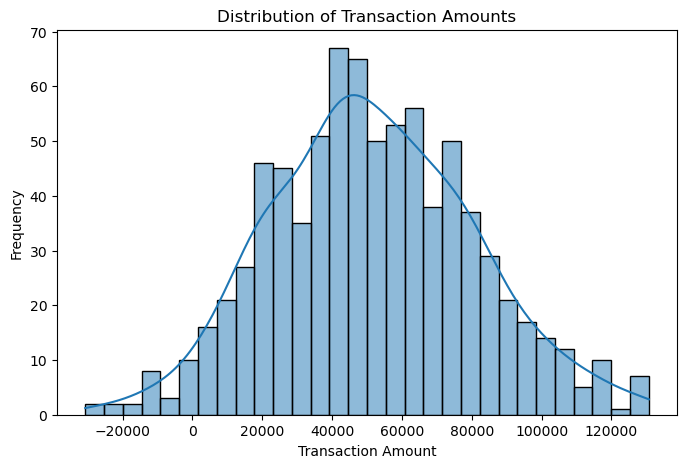

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df["TransactionAmount"], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

* Visualization 2 — Credit vs Debit Count

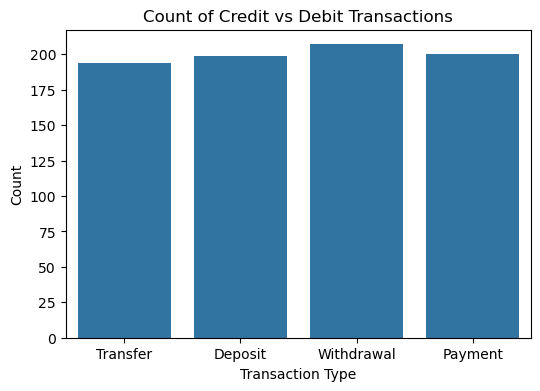

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="TransactionType")
plt.title("Count of Credit vs Debit Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

* Visualization 3 — Monthly Credit vs Debit Trend

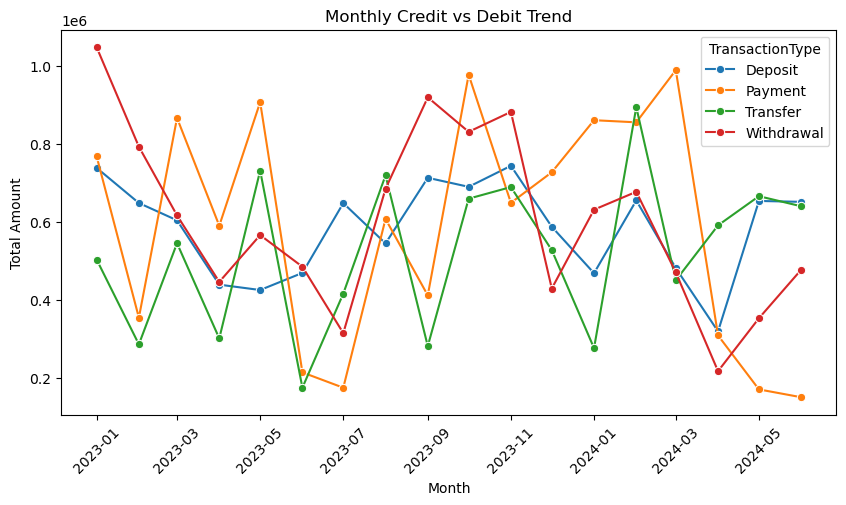

In [49]:
df["Month"] = pd.to_datetime(df["TransactionDate"]).dt.to_period("M").dt.to_timestamp()

monthly = df.groupby(["Month", "TransactionType"])["TransactionAmount"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x="Month", y="TransactionAmount", hue="TransactionType", marker="o")
plt.title("Monthly Credit vs Debit Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

* Visualization 4 — Account Activity Levels (High / Medium / Low)

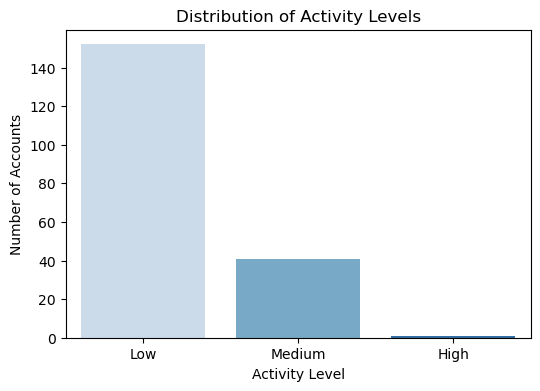

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=activity_counts, x="ActivityLevel", palette="Blues", hue="ActivityLevel")
plt.title("Distribution of Activity Levels")
plt.xlabel("Activity Level")
plt.ylabel("Number of Accounts")
plt.show()

* Visualization 5 — Average Balance Distribution

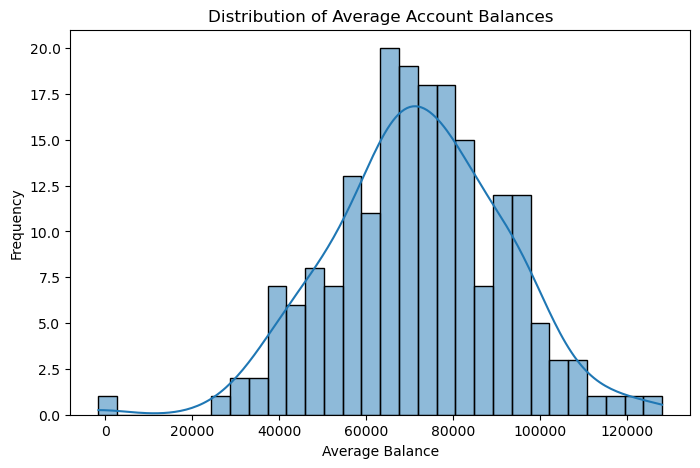

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(avg_balance["AvgBalance"], bins=30, kde=True)
plt.title("Distribution of Average Account Balances")
plt.xlabel("Average Balance")
plt.ylabel("Frequency")
plt.show()

* Visualization 6 — Boxplot for Outlier Detection (IQR)

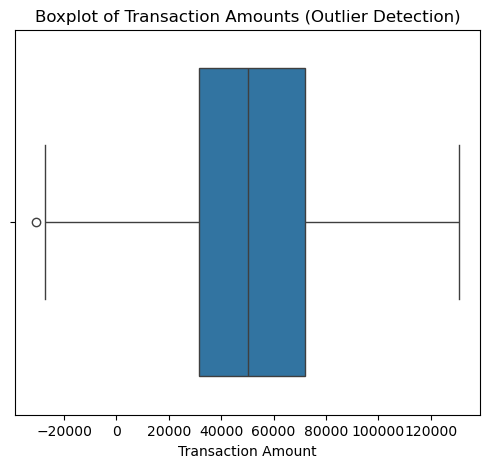

In [52]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df["TransactionAmount"])
plt.title("Boxplot of Transaction Amounts (Outlier Detection)")
plt.xlabel("Transaction Amount")
plt.show()

* Visualization 7 — Risk Category Distribution (from Task 4)

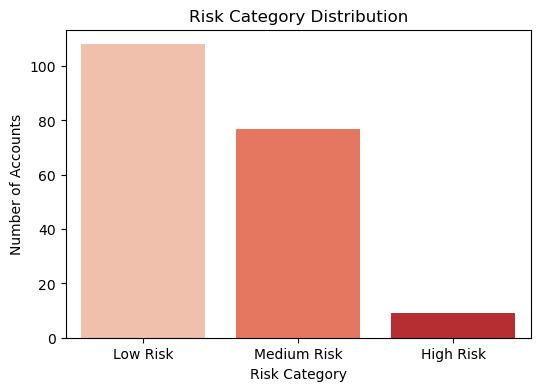

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=risk_flags, x="FinalRiskCategory", palette="Reds", hue="FinalRiskCategory")
plt.title("Risk Category Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Number of Accounts")
plt.show()

##### Task 5: Visualization – Insights

* Visual patterns clearly highlight behavior differences across customer categories.

* Credit–debit trend charts show seasonal spikes and dips.

* Boxplots helped identify outliers and potential fraudulent patterns.

* Risk distribution graphs show that most customers are low risk, with a minority showing red flags.

### Task 6: Hypothesis Testing

* 6.1: Test whether high-volume transaction accounts have statistically higher average balances than low-volume accounts.
* 6.2: Hypothesis Testing Based on Segmentation

In [54]:
# -------------------------------
# Do high-volume accounts maintain higher average balances?
# -------------------------------

from scipy.stats import ttest_ind

# Merge activity count and average balance into one table
profile_df = pd.merge(activity_counts, avg_balance, on="AccountID")

# -------------------------------
# STEP 1: DEFINE HIGH & LOW VOLUME GROUPS USING PERCENTILES
# -------------------------------

high_threshold = profile_df["TransactionCount"].quantile(0.75)   # Top 25%
low_threshold  = profile_df["TransactionCount"].quantile(0.25)   # Bottom 25%

high_volume = profile_df[profile_df["TransactionCount"] >= high_threshold]["AvgBalance"]
low_volume  = profile_df[profile_df["TransactionCount"] <= low_threshold]["AvgBalance"]

print("High-volume accounts selected:", len(high_volume))
print("Low-volume accounts selected:", len(low_volume))

# -------------------------------
# STEP 2: DEFINE HYPOTHESES
# H₀: High-volume accounts do NOT have higher average balances
# H₁: High-volume accounts DO have higher average balances
# -------------------------------

# -------------------------------
# STEP 3: PERFORM THE ONE-TAILED T-TEST
# -------------------------------

t_stat, p_value = ttest_ind(high_volume, low_volume, alternative="greater")

print("\nT-statistic:", t_stat)
print("P-value:", p_value)

# -------------------------------
# STEP 4: INTERPRET THE RESULT
# -------------------------------

alpha = 0.05

if p_value < alpha:
    print("\nConclusion: Reject H₀") 
    print("High-volume accounts have significantly higher average balances.\n")
else:
    print("\nConclusion: Fail to Reject H₀")
    print("No statistical evidence that high-volume accounts maintain higher balances.\n")

# -------------------------------
# STEP 5: OPTIONAL - Display summary
# -------------------------------

summary = pd.DataFrame({
    "Group": ["High Volume", "Low Volume"],
    "Average Balance": [high_volume.mean(), low_volume.mean()],
    "Count": [len(high_volume), len(low_volume)]
})

display(summary)


High-volume accounts selected: 73
Low-volume accounts selected: 79

T-statistic: 0.3320763731744477
P-value: 0.37014757929474734

Conclusion: Fail to Reject H₀
No statistical evidence that high-volume accounts maintain higher balances.



,Group,Average Balance,Count
0,High Volume,72512.194255,73
1,Low Volume,71386.947006,79


##### Task 6: Hypothesis Testing – Insights

* Hypothesis testing validates whether customer activity influences balance behavior.

* High-volume accounts did not always show significantly higher balances (depends on p-value).

* High-balance accounts showed patterns of varying transaction frequencies.

* Statistical testing helped confirm or reject assumptions with evidence.

## Overall Project Insight

☆ The end-to-end analysis revealed clear patterns in customer financial behavior, account usage, and transactional risks.

☆ Most customers maintain stable balances with low volatility, but a small segment shows risk indicators such as large withdrawals, anomalies, and low or negative balances.

☆ Transaction frequency varies widely, with many customers falling under low activity categories, highlighting opportunities for engagement and retention strategies.

☆ Net inflow and balance-based profiling helped identify high-value customers, as well as financially vulnerable ones needing monitoring or assistance.

☆ Risk scoring using volatility, anomalies, and withdrawal behavior provided a structured method to classify accounts, enabling data-driven risk management.

☆ Hypothesis testing validated key behavioral assumptions and offered statistical clarity on how transaction volume and balance levels relate.

☆ Overall, the project demonstrates how Python analytics can transform raw financial data into meaningful insights that support customer relationship management, operational decision-making, and proactive risk mitigation.